In [1]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram
%matplotlib inline

In [2]:
# Considering a n-bit secret number that taken as input is being guessed
secretnumber = '10110010'

In [3]:
n = len(secretnumber) # counting number of bits 

qc = QuantumCircuit(n+1, n) # creating n+1 qubits to guess the number. Stroing the guessed n-bit number in classical bit



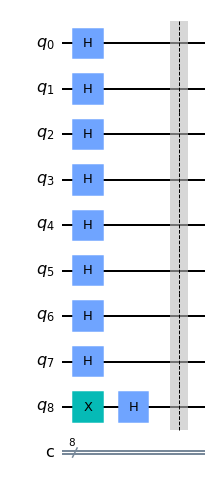

In [4]:
# Taking super-position of the unknown input

qc.h(range(n))

# Applying X followed by H to the n+1 qubit
qc.x(n)
qc.h(n)

qc.barrier()
qc.draw(output = 'mpl')

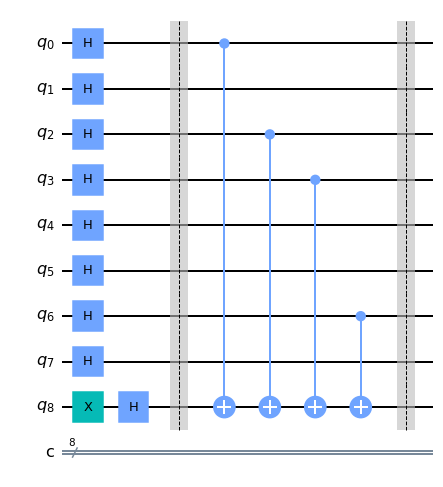

In [8]:
# Now after taking the superposition of input, for ever |1> qubit, it will act as controlled not for the n+1 qubit

for ii, yesno in enumerate (secretnumber) :
    if yesno == '1':
        qc.cx(ii, n)
        
qc.barrier()
qc.draw(output = 'mpl')


In [9]:
# Now applying Hadamad gate to the super-position states
qc.h(range(n))

qc.barrier()
#Then measuring the output and storing in n classical bits

qc.measure(range(n),range(n))

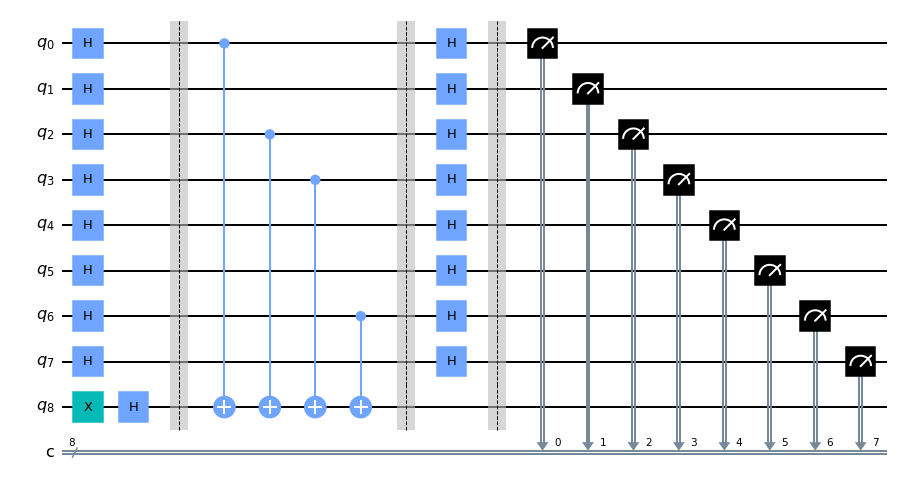

In [10]:
qc.draw(output ='mpl')

In [17]:
#checking result using the simlator

simulator = Aer.get_backend('qasm_simulator')
result = execute(qc,backend = simulator, shots = 1).result()
counts = result.get_counts()

print(counts)

{'01001101': 1}


In [ ]:
# we see that the quantum computer has guessed the output in reverse formart as the bits are stored in reverse ,i.e in 